In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
data = pd.read_csv('Police.csv')
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [6]:
data.isnull().sum() # عدد القيم الفقودة في كل عامود 

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [ ]:
# إسقاط الأعمدة التى الغبر مفيدة 
data.drop(columns =['search_type','country_name'],inplace = True )

<h3>
الخطوات التالية هي ملئ القيم الفققودة في البيانات 
</h3>

In [12]:
data['driver_gender'].value_counts(dropna=False)

M      45164
F      16310
NaN     4061
Name: driver_gender, dtype: int64

In [13]:
data['driver_gender'].fillna(value='M',limit=3010,inplace=True)

In [14]:
data['driver_gender'].fillna(value='F',inplace=True)

In [15]:
data['driver_gender'].value_counts(dropna=False)

M    48174
F    17361
Name: driver_gender, dtype: int64

In [16]:
data['driver_age_raw'].median()

1978.0

In [17]:
data['driver_age_raw'].fillna(1978.0,inplace=True)

In [18]:
data['driver_age_raw'].isnull().any()

False

In [19]:
data['driver_age'].mean()

34.14898412491017

In [20]:
data['driver_age'].fillna(34,inplace=True)

In [21]:
data['driver_age'].isnull().any()

False

In [22]:
data['driver_race'].value_counts(dropna=False)

White       45747
Black        8267
Hispanic     5611
NaN          4060
Asian        1639
Other         211
Name: driver_race, dtype: int64

In [23]:
data['driver_race'].fillna('White',limit=2000,inplace=True)

In [24]:
data['driver_race'].fillna('Black',limit=700,inplace=True)

In [25]:
data['driver_race'].fillna('Hispanic',limit=500,inplace=True)

In [26]:
data['driver_race'].fillna('Asian',limit=300,inplace=True)

In [27]:
data['driver_race'].fillna('Other',inplace=True)

In [28]:
data['driver_race'].isnull().any()

False

In [29]:
data['driver_race'].value_counts(dropna=False)

White       47747
Black        8967
Hispanic     6111
Asian        1939
Other         771
Name: driver_race, dtype: int64

In [30]:
data['violation_raw'].mode()

0    Speeding
Name: violation_raw, dtype: object

In [31]:
data['violation'].mode()

0    Speeding
Name: violation, dtype: object

In [32]:
data['violation_raw'].fillna('Speeding',inplace=True)

In [33]:
data['violation'].fillna('Speeding',inplace=True)

In [34]:
data['stop_outcome'].value_counts(dropna=False)

Citation            56564
NaN                  4060
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

In [35]:
data['stop_outcome'].fillna('Citation',inplace=True)

In [36]:
data['is_arrested'].value_counts(dropna=False)

False    59215
NaN       4060
True      2260
Name: is_arrested, dtype: int64

In [37]:
data['is_arrested'].fillna('False',inplace=True)

In [38]:
data['stop_duration'].value_counts(dropna=False)

0-15 Min     47379
16-30 Min    11448
NaN           4060
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [39]:
data['stop_duration'].fillna('0-15 Min',inplace=True)

In [40]:
data.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [41]:
data.head() 

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [46]:
data.groupby('driver_gender')['driver_age'].mean()

driver_gender
F    32.515581
M    34.724312
Name: driver_age, dtype: float64

<AxesSubplot:xlabel='driver_gender', ylabel='driver_age'>

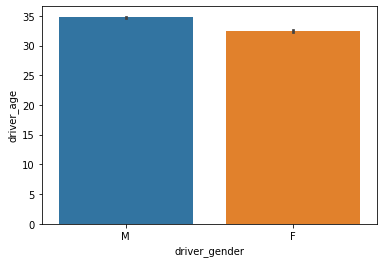

In [73]:
sn.barplot(data=data,x='driver_gender',y='driver_age')

In [47]:
data.groupby('stop_duration')['driver_age'].mean()

stop_duration
0-15 Min     34.019538
16-30 Min    34.119322
2            52.000000
30+ Min      36.543634
Name: driver_age, dtype: float64

<AxesSubplot:xlabel='stop_duration', ylabel='driver_age'>

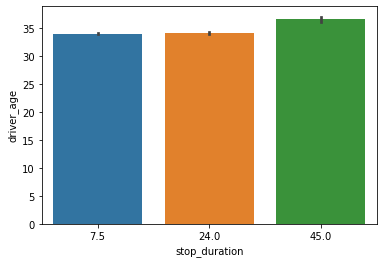

In [74]:
sn.barplot(data=data,x='stop_duration',y='driver_age')

In [52]:
data.groupby('violation_raw')['driver_age'].std()

violation_raw
APB                                 11.432702
Call for Service                    13.095601
Equipment/Inspection Violation      11.373133
Motorist Assist/Courtesy            11.921674
Other Traffic Violation             13.231707
Registration Violation              11.143425
Seatbelt Violation                  10.214369
Special Detail/Directed Patrol      11.363469
Speeding                            11.968036
Suspicious Person                   12.399927
Violation of City/Town Ordinance    12.532674
Warrant                             13.489090
Name: driver_age, dtype: float64

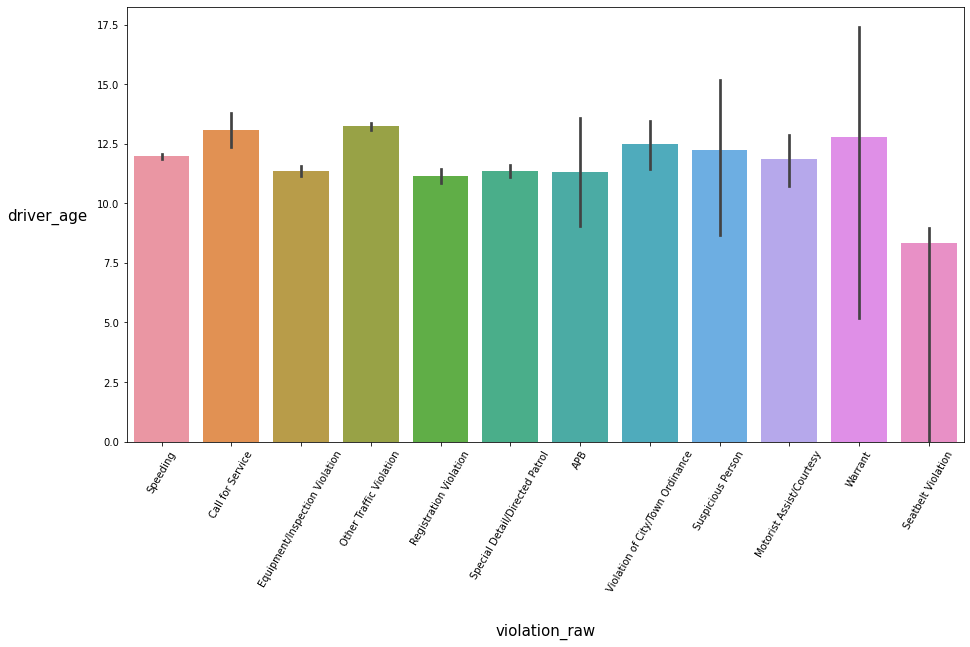

In [93]:
plt.figure(figsize=(15,8))
sn.barplot(data=data,x='violation_raw',y='driver_age',estimator=np.std)
plt.xlabel('violation_raw',fontdict={'fontsize':15},labelpad=30)
plt.ylabel('driver_age',rotation=0,fontdict={'fontsize':15},labelpad=50)
plt.xticks(rotation=60)
plt.show()

In [51]:
data.groupby('driver_race')['driver_age'].std()

driver_race
Asian       10.552480
Black       11.313031
Hispanic    10.313578
Other        6.220063
White       12.859620
Name: driver_age, dtype: float64

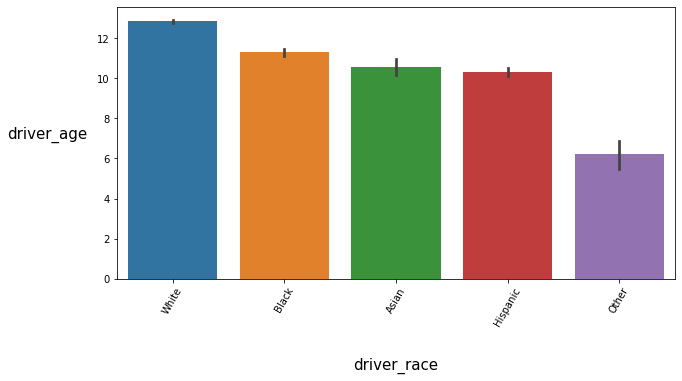

In [94]:
plt.figure(figsize=(10,5))
sn.barplot(data=data,x='driver_race',y='driver_age',estimator=np.std)
plt.xlabel('driver_race',fontdict={'fontsize':15},labelpad=30)
plt.ylabel('driver_age',rotation=0,fontdict={'fontsize':15},labelpad=50)
plt.xticks(rotation=60)
plt.show()

In [53]:
data['stop_duration'].value_counts()

0-15 Min     51439
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [54]:
# تغير قيم العامود بالمتوسط
data['stop_duration']=data['stop_duration'].map({'0-15 Min': 7.5,'16-30 Min':24,'30+ Min':45})

In [56]:
data['stop_duration'].mean()

11.897022919400616

In [57]:
# جميل جدا
data.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6516.0,31.686157,11.373133,16.0,23.0,28.0,39.0,81.0
Moving violation,11926.0,36.724971,13.231707,15.0,25.0,35.0,46.0,86.0
Other,3583.0,40.174156,12.610465,16.0,30.0,40.0,49.5,86.0
Registration/plates,2243.0,32.658493,11.143425,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,41264.0,33.335959,11.968036,15.0,23.0,32.0,40.0,88.0


In [71]:
# crosstab : pivot_table مشابه 
pd.crosstab(index=data['violation_raw'],columns=data['driver_race'],
            values=data['driver_age'],aggfunc=np.mean)

driver_race,Asian,Black,Hispanic,Other,White
violation_raw,,,,,
APB,NaN,33.333333,36.875000,NaN,35.324324
Call for Service,32.058824,32.463918,31.809917,35.800000,34.390597
Equipment/Inspection Violation,31.200000,29.706022,29.589336,33.600000,32.868069
Motorist Assist/Courtesy,44.000000,31.720000,34.333333,30.000000,36.275510
Other Traffic Violation,37.231405,36.444605,34.307194,36.775510,37.247380
Registration Violation,34.000000,30.922465,30.740899,44.000000,34.041030
Seatbelt Violation,NaN,42.000000,23.000000,NaN,26.000000
Special Detail/Directed Patrol,39.977778,43.074627,40.219672,41.133333,44.035336
Speeding,33.048880,32.696650,31.291179,33.908029,33.586249


In [98]:
# تغير نوع العامود
data['stop_date'] = data['stop_date'].astype('datetime64')

In [99]:
data['stop_date'].max()

Timestamp('2012-12-07 00:00:00')

In [100]:
data['stop_date'].min()

Timestamp('2005-01-02 00:00:00')

In [101]:
# إنشاء عامود للسنة
data['Year'] = data['stop_date'].apply(lambda x:x.strftime('%Y'))

In [103]:
data['Year'].value_counts()

2006    10639
2012    10515
2007     9476
2008     8752
2011     8126
2009     7908
2010     7561
2005     2558
Name: Year, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

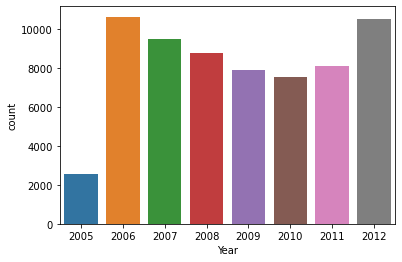

In [104]:
sn.countplot(data['Year'])

In [111]:
data.groupby('Year')['driver_age'].mean().to_frame()

,driver_age
Year,
2005,32.755668
2006,32.962496
2007,33.273744
2008,34.551760
2009,35.032119
2010,35.234096
2011,34.861925
2012,34.085497


In [112]:
pd.crosstab(index=data['violation_raw'],columns=data['Year'],
            values=data['driver_age'],aggfunc=np.std)

Year,2005,2006,2007,2008,2009,2010,2011,2012
violation_raw,,,,,,,,
APB,6.855655,15.171145,9.669540,14.463748,11.175867,11.015141,9.036961,11.900380
Call for Service,14.382468,11.575862,11.938619,14.474101,13.173242,11.551877,14.391548,13.763085
Equipment/Inspection Violation,11.112631,10.973876,11.356923,12.001403,10.980750,10.814086,11.438303,11.628738
Motorist Assist/Courtesy,13.403858,11.733599,10.547581,12.784539,11.721022,14.494252,10.094043,11.518846
Other Traffic Violation,12.854643,12.542680,13.097908,12.806761,13.069580,13.453185,13.790372,12.682721
Registration Violation,10.548135,10.065884,10.678741,10.771777,11.430935,11.395416,10.939619,12.086279
Seatbelt Violation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.214369
Special Detail/Directed Patrol,11.040833,9.192388,10.949864,10.382530,11.142494,10.938463,11.629627,12.555022
Speeding,12.115501,12.011642,11.953324,11.989441,11.520991,11.859172,12.021551,12.250116
